# Семинар 1
**План семинара:**
1. Получение информации об оборудовании
2. Библиотека Pytorch
  - установка (Windows/Linux(Google Colab); CPU/GPU)
  - обзор возможностей и особенностей
  - запуск простейших примеров
3. Введение в глубокое обучение
  - перцептрон (решение практических задач)

# Получение информации об оборудовании

**Windows** - GUI\
**Linux** (Google colab) - terminal

In [1]:
# версия Linux
!cat /proc/version

Linux version 5.10.133+ (builder@b1018906abc3) (Chromium OS 12.0_pre422132_p20210405-r10 clang version 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/clang cd442157cff4aad209ae532cbf031abbe10bc1df), LLD 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/lld cd442157cff4aad209ae532cbf031abbe10bc1df)) #1 SMP Fri Aug 26 08:44:51 UTC 2022


In [2]:
# версия дистрибутива Linux
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic


In [3]:
# видеокарта
!nvidia-smi

Sun Dec  4 17:12:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

CUDA Version в nvidia-smi - это не ваша текущая версия CUDA, а [максимально поддерживаемая версия](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html) для текущего драйвера видеокарты.

In [4]:
# cuda compiler
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [5]:
# процессор
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

In [6]:
# процессор
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [7]:
# оперативная память
!grep MemTotal /proc/meminfo

MemTotal:       13297228 kB


In [8]:
# диск
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   27G   52G  35% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   48K  6.4G   1% /var/colab
/dev/sda1        75G   41G   35G  55% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [9]:
!du -h | sort -h

8.0K	./.config/configurations
72K	./.config/logs/2022.12.01
76K	./.config/logs
108K	./.config
55M	.
55M	./sample_data


In [10]:
# права в Google Colab
!whoami

root


# Библиотека Pytorch

## Установка

Ссылки для установки под ваше оборудование можно найти [тут](https://pytorch.org/get-started/locally/).

In [11]:
import torch

In [12]:
torch.cuda.is_available()

True

In [13]:
!python -m pip list | grep torch

torch                         1.12.1+cu113
torchaudio                    0.12.1+cu113
torchsummary                  1.5.1
torchtext                     0.13.1
torchvision                   0.13.1+cu113


## Обзор возможностей и особенностей

## Тензоры

In [14]:
a = torch.Tensor([1,2,3])
a

tensor([1., 2., 3.])

In [15]:
b = torch.tensor([1,2,3])
b

tensor([1, 2, 3])

Типы данных

In [16]:
a.dtype, b.dtype

(torch.float32, torch.int64)

Перевод данных в другой тип

In [17]:
c = b.float()

print(c, c.dtype)

print(c.int(), c.int().dtype)
print(c.long(), c.long().dtype)
print(c.double(), c.double().dtype)

tensor([1., 2., 3.]) torch.float32
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.], dtype=torch.float64) torch.float64


In [18]:
x = torch.rand(2, 3)
print(x) 
print(x.device)
print(x.dtype)

tensor([[0.3055, 0.5751, 0.1104],
        [0.3983, 0.5368, 0.9664]])
cpu
torch.float32


## Воспроизводимость результатов

In [19]:
# для воспроизводимости результатов
# не изменяйте и не удаляйте этот код
from numpy.random import seed
import random
import torch

random.seed(0)
seed(0)
torch.manual_seed(0)

In [20]:
!pip install pytorch-lightning -qqq

     |████████████████████████████████| 798 kB 38.1 MB/s 
     |████████████████████████████████| 125 kB 70.4 MB/s 
     |████████████████████████████████| 512 kB 74.2 MB/s 
     |████████████████████████████████| 87 kB 3.1 MB/s 


In [21]:
import pytorch_lightning as pl

In [22]:
from pytorch_lightning import seed_everything

Function that sets seed for pseudo-random number generators in: pytorch, numpy, python.random

In [23]:
seed_everything(0, workers=True)                

INFO:lightning_lite.utilities.seed:Global seed set to 0


0

Подробнее можно прочитать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

## CUDA

In [24]:
# проверка доступности видеокарты, выбор устройства CPU или GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Данные нужно вручную переносить в видеопамять -- метод cuda. Перенос в оперативную память -- cpu. Альтернатива -- использование метода `.to(device)`. По умолчанию данные на cpu.

In [25]:
d = c.to(device)

In [26]:
import torch

In [27]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

In [28]:
!nvidia-smi

Sun Dec  4 17:12:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    25W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [30]:
allocate_empty_tensor(2048)

In [31]:
torch.cuda.memory_allocated()

512

In [32]:
torch.cuda.memory_reserved()

35651584

In [33]:
!nvidia-smi

Sun Dec  4 17:12:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    25W /  70W |    644MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
allocate_empty_tensor(3072)

In [35]:
torch.cuda.memory_reserved()

85983232

In [36]:
!nvidia-smi

Sun Dec  4 17:12:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    25W /  70W |    692MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [37]:
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

2097152

In [38]:
!nvidia-smi

Sun Dec  4 17:12:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    25W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:
allocate_empty_tensor(600000)
torch.cuda.memory_reserved()

9833545728

## Точность

In [40]:
import torch
torch.manual_seed(1337)
x = torch.randn(5000, 5000)
print(x[0, 0])
print(x.size())

def matrix_power(x):
  y = x @ x @ x @ x @ x @ x
  return (y).sum().item()

print(matrix_power(x))
print(matrix_power(x.cuda()))
print(x.dtype)

tensor(0.1808)
torch.Size([5000, 5000])
27654770130944.0
27654807879680.0
torch.float32


In [43]:
import numpy as np
print(matrix_power(x.numpy()))
np.linalg.matrix_power(x.numpy(),6).sum()

27654791102464.0


27654774000000.0

Takeaway: numerical precision of floating point computations can vary between libraries, environments and devices, and from the user side, it is often hard to resolve this issue altogether. Usually, this happens due to a different summation order in code or due to inherent nondeterminism of hardware.

However, note that the relative error is small enough, which makes such blatant discrepancies less of a problem in regular deep learning code.


## Нейроны и линейные слои

![alt text](https://drive.google.com/uc?export=view&id=1k96ch-5lAGYrfBk4xgoty93xy-GP2bhr)


![alt text](https://drive.google.com/uc?export=view&id=1ORawq1pZJ7a2z7vUD2PPyLELkOHoAB51)

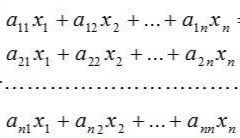

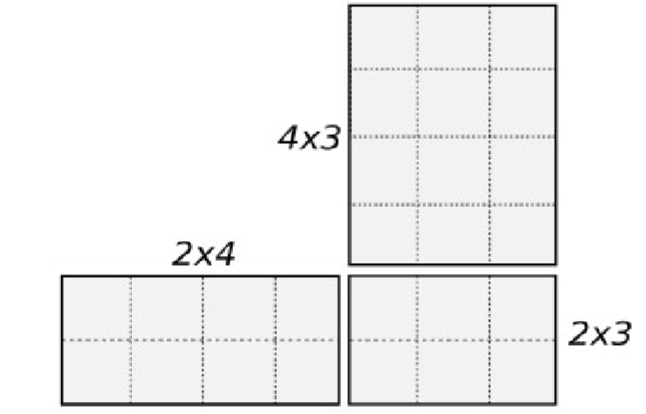

In [44]:
batch_size = 2 # Количество покупателей
w = 4          # Количество существующих товаров
m = 3          # Количество существующих магазинов

# Матрица покупателей
X = torch.rand(batch_size, w)

# Матрица цен в магазине
W = torch.rand(m,w)

# Цена за топливо
b = torch.rand(m)

print(X.shape, W.shape, b.shape)

print(X)

answer = X @ W.T + b
answer.shape

torch.Size([2, 4]) torch.Size([3, 4]) torch.Size([3])
tensor([[0.5997, 0.7686, 0.8438, 0.6866],
        [0.9745, 0.5593, 0.4227, 0.4468]])


torch.Size([2, 3])

In [51]:
linear = torch.nn.Linear(4, 3)
out = linear(X)
out.shape

torch.Size([2, 3])

In [46]:
linear.weight.data.shape

torch.Size([3, 4])

### Встроенные слои

In [47]:
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

In [48]:
dir(nn)[:10]

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d']

Два способа создания нейросети:
  1. на основе готового класса `nn.Sequential` объединяющего отдельные слои
    - данные передаются по сети в том порядке, в каком объявлены слои
    - функции активации задаются как отдельные слои
  2. свой класс для нейросети, на основе `nn.Module`
    - порядок передачи данных можно менять во время обучения, переопределив forward - динамический граф вычислений

Первый способ стоит использовать только как контейнер для ряда слоев. Неросеть нужно наследовать от `nn.Module`.


In [53]:
device = 'cuda'
net_seq = nn.Sequential(
    nn.Linear(in_features=3, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=2),                                                            
)
net_seq.to(device)
net_seq
X = torch.rand(3)

In [54]:
net_seq(X.to(device))

tensor([ 0.3945, -0.6897], device='cuda:0', grad_fn=<AddBackward0>)

In [55]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=2)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(self.fc2(x))

In [57]:
net_model = Model()
net_model.to(device)
net_model

Model(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)

### **Задача 1**. Посчитайте количество обучаемых параметров в сети net_seq и net_model.

In [58]:
#!pip install torchsummary

from torchsummary import summary

summary(net_model, (1, 2, 3))
summary(net_seq, (1, 2, 3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 2, 5]              20
            Linear-2              [-1, 1, 2, 2]              12
Total params: 32
Trainable params: 32
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 2, 5]              20
           Sigmoid-2              [-1, 1, 2, 5]               0
            Linear-3              [-1, 1, 2, 2]              12
Total params: 32
Trainable params: 32
Non-trainable params: 0
-----------------------------------------------------

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


# Введение в глубокое обучение

In [59]:
import numpy as np
import torch

![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [60]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [61]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-0.3808]], requires_grad=True), Parameter containing:
 tensor([0.4640], requires_grad=True))

In [62]:
neuron.fc.weight.data = torch.tensor([[-0.6]])
neuron.fc.bias.data = torch.tensor([0.5])
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-0.6000]], requires_grad=True), Parameter containing:
 tensor([0.5000], requires_grad=True))

In [63]:
x = torch.tensor([0.0])
print(neuron(x))

x = torch.tensor([1.0])
print(neuron(x))

tensor([1.], grad_fn=<NotImplemented>)
tensor([0.], grad_fn=<NotImplemented>)


## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [64]:
import torch
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [65]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-0.1402,  0.3836]], requires_grad=True), Parameter containing:
 tensor([0.2378], requires_grad=True))

In [66]:
neuron.fc.weight.data = torch.tensor([[0.1, 0.1]])
neuron.fc.bias.data = torch.tensor([-0.15])

In [67]:
x = torch.tensor([0.0, 0.0])
print(neuron(x))

x = torch.tensor([1.0, 0.0])
print(neuron(x))

x = torch.tensor([0.0, 1.0])
print(neuron(x))

x = torch.tensor([1.0, 1.0])
print(neuron(x))

tensor([0.], grad_fn=<NotImplemented>)
tensor([0.], grad_fn=<NotImplemented>)
tensor([0.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)


## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [68]:
neuron.fc.weight.data = torch.tensor([[0.2, 0.2]])
neuron.fc.bias.data = torch.tensor([-0.1])

In [69]:
x = torch.tensor([0.0, 0.0])
print(neuron(x))

x = torch.tensor([1.0, 0.0])
print(neuron(x))

x = torch.tensor([0.0, 1.0])
print(neuron(x))

x = torch.tensor([1.0, 1.0])
print(neuron(x))

tensor([0.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)


## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

XOR нельзя сделать на одном нейроне

## **Вопрос 1**. Какие нейронные сети могут иметь только линейную разделяющую поверхность?

Сети, состоящие из одного нейрона, или сети, в которых между слоями нет функций активации

## **Вопрос 2**. Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

Нет, так сеть, состоящая из идущих друг за другом линейных слои с линейной функции активации (f(x)=x), будет подобно сетью с одним линейным слоем

# Домашнее задание

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

In [70]:
# версия 1
class Neuron(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return torch.heaviside(x, torch.tensor([0.0]))

neuron = Neuron()

def forward(x1, x2):
    return neuron(neuron(x1+x2-0.5) - neuron(x1+x2-1.5) - 0.5)

In [71]:
# версия 2 
class Neuron2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(2, 2)
    self.linear2 = torch.nn.Linear(2, 1)

  def forward(self, x):
      x = self.linear1(x)
      x = torch.heaviside(x, torch.tensor([0.0]))
      return torch.heaviside(self.linear2(x), torch.tensor([0.0]))

neuron2 = Neuron2()
neuron2.linear1.weight.data = torch.tensor([[1.0, 1.0],
                                            [1.0, 1.0]])
neuron2.linear1.bias.data = torch.tensor([-1.5, -0.5])

neuron2.linear2.weight.data = torch.tensor([[-1.0, 1.0]])
neuron2.linear2.bias.data = torch.tensor([-0.5])

In [72]:
x = torch.tensor([0.0, 0.0])
print(x, '\t', forward(x[0], x[1]), '\t', neuron2(x).detach())

x = torch.tensor([1.0, 0.0])
print(x, '\t', forward(x[0], x[1]), '\t', neuron2(x).detach())

x = torch.tensor([0.0, 1.0])
print(x, '\t', forward(x[0], x[1]), '\t', neuron2(x).detach())

x = torch.tensor([1.0, 1.0])
print(x, '\t', forward(x[0], x[1]), '\t', neuron2(x).detach())

tensor([0., 0.]) 	 tensor([0.]) 	 tensor([0.])
tensor([1., 0.]) 	 tensor([1.]) 	 tensor([1.])
tensor([0., 1.]) 	 tensor([1.]) 	 tensor([1.])
tensor([1., 1.]) 	 tensor([0.]) 	 tensor([0.])


**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

In [73]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [74]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

None
None
None
None


In [75]:
loss = a*b+c*d
loss.backward()

In [76]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

print((a*b).grad_fn)
print((c*d).grad_fn)
print((a*b+c*d).grad_fn)

tensor([4.])
tensor([2.])
tensor([5.])
None


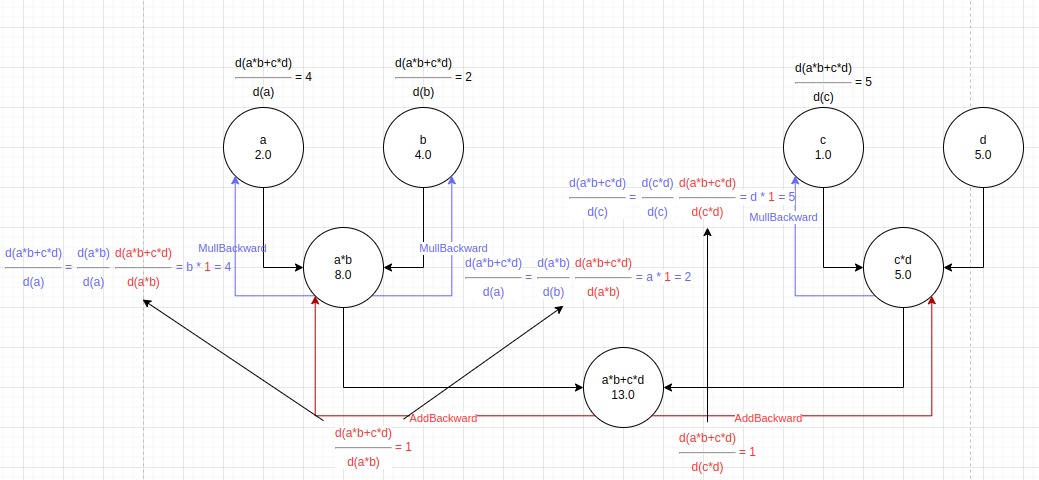

**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [78]:
import gc
try: del a 
except: pass
gc.collect(), torch.cuda.empty_cache()

(79, None)

In [82]:
# для float16
a = torch.rand(7_000_000_000, dtype=torch.float16, device='cuda')
print(a.size())
del a

try:
    a = torch.rand(8000000000, dtype=torch.float16, device='cuda')
    del a
except:
    print("Не хватает памяти")

print()
import gc
print(gc.collect())
torch.cuda.empty_cache()
print(torch.cuda.memory_reserved(), torch.cuda.memory_allocated())

torch.Size([7000000000])
Не хватает памяти

224
2097152 9728


In [83]:
# для float32
a = torch.rand(7000000000//2, dtype=torch.float32, device='cuda')
print(a.size())
del a

try:
    a = torch.rand(8000000000//2, dtype=torch.float32, device='cuda')
    a.size()
except:
    print("Не хватает памяти")

print()
import gc
print(gc.collect())
torch.cuda.empty_cache()
print(torch.cuda.memory_reserved(), torch.cuda.memory_allocated())

torch.Size([3500000000])
Не хватает памяти

224
2097152 9728


In [84]:
# для float64
a = torch.rand(7000000000//4, dtype=torch.float64, device='cuda')
print(a.size())
del a

try:
    a = torch.rand(8000000000//4, dtype=torch.float64, device='cuda')
    a.size()
except:
    print("Не хватает памяти")

print()
import gc
print(gc.collect())
torch.cuda.empty_cache()
print(torch.cuda.memory_reserved(), torch.cuda.memory_allocated())

torch.Size([1750000000])
Не хватает памяти

224
2097152 9728


In [86]:
# для int32
a = torch.zeros(7000000000//2, dtype=torch.int32, device='cuda')
print(a.size())
del a

try:
    a = torch.zeros(8000000000//2, dtype=torch.int32, device='cuda')
    a.size()
    del a
except:
    print("Не хватает памяти")

print()
import gc
print(gc.collect())
torch.cuda.empty_cache()
print(torch.cuda.memory_reserved(), torch.cuda.memory_allocated())

torch.Size([3500000000])
Не хватает памяти

224
2097152 9728


In [85]:
# для int64
a = torch.zeros(7000000000//4, dtype=torch.int64, device='cuda')
print(a.size())
del a

try:
    a = torch.zeros(8000000000//4, dtype=torch.int64, device='cuda')
    a.size()
except:
    print("Не хватает памяти")

print()
import gc
print(gc.collect())
torch.cuda.empty_cache()
print(torch.cuda.memory_reserved(), torch.cuda.memory_allocated())

torch.Size([1750000000])
Не хватает памяти

224
2097152 9728


Видно, что видеокарта может вместить 
- ~7000000000 элементов типа float16
- ~3500000000 элементов типа float32 и int32
- ~1750000000 элементов типа float64 и int64

Закономерно, что если float32 и int32 требуют в 2 раза больше памяти, то и элементов этих типов видеокарта может хранить в два раза меньше. То же справедливо и для float64 и int64

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [99]:
gc.collect()
torch.cuda.empty_cache()

def allocate_empty_tensor(dim_size):
  a=torch.zeros(1024*1024*128,dim_size,dtype=torch.float32,device='cuda')
  return a

print(torch.cuda.memory_allocated()/1024//1024, "MB")
print(torch.cuda.memory_reserved()/1024/1024//1024, "GB")
print()
print("FILLING")
try:
    for i in range(13): # Trying to work with tensors from 1 GB to 13GB. GPU MAX 16GB
        temp_working_tensor = allocate_empty_tensor(i)
        print(torch.cuda.memory_allocated()/1024//1024, "MB")
        print(torch.cuda.memory_reserved()/1024/1024//1024, "GB")
        print()
except Exception as e:
    print(e)
    print()

print("CLEARING")
del temp_working_tensor
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_allocated()/1024//1024, "MB")
print(torch.cuda.memory_reserved()/1024/1024//1024, "GB")
print()

4608.0 MB
4.0 GB

FILLING
4608.0 MB
4.0 GB

5120.0 MB
5.0 GB

5632.0 MB
6.0 GB

6144.0 MB
7.0 GB

6656.0 MB
9.0 GB

7168.0 MB
12.0 GB

5632.0 MB
10.0 GB

6144.0 MB
10.0 GB

6656.0 MB
11.0 GB

7168.0 MB
11.0 GB

9728.0 MB
12.0 GB

CUDA out of memory. Tried to allocate 5.50 GiB (GPU 0; 14.76 GiB total capacity; 9.50 GiB already allocated; 4.46 GiB free; 9.50 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

CLEARING
4608.0 MB
4.0 GB



**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [139]:
del a, b
gc.collect(), torch.cuda.empty_cache()

(8, None)

In [140]:
import torch
try:
    a = torch.nn.Linear(1, 1500000000, device='cuda')
    b = torch.ones(1, device='cuda')
    print("Теперь пропустим тензор через сеть")
    c = a(b)
    print(c.size())
    del a, b, c
except Exception as e:
    print("Упс", e)

Теперь пропустим тензор через сеть
Упс CUDA out of memory. Tried to allocate 5.59 GiB (GPU 0; 14.76 GiB total capacity; 11.18 GiB already allocated; 2.78 GiB free; 11.18 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


Как видно, видеопамяти хватило на хранение матрицы весов (1х1500000000) и входного тензора (1), но результат работы линейного слоя (1500000000) уже не смог влезть

# Рекомендуемые ссылки

- [Нейронные сети и компьютерное зрение, Samsung AI Center, часть 1](https://stepik.org/course/50352/syllabus)
- [Cимулятор](https://playground.tensorflow.org/) нейронов и нейронных сетей